In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('forecasting_case_study.csv',parse_dates = ['date'])

In [3]:
data.dtypes

Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)            object
In-Store Promo                 int64
Catalogue Promo                int64
Store End Promo                int64
Google_Mobility              float64
Covid_Flag                     int64
V_DAY                          int64
EASTER                         int64
CHRISTMAS                      int64
dtype: object

In [4]:
data['p_discount'] = data['Price Discount (%)'].astype(str)
data['p_d'] = ''

for i in range(len(data['p_discount'])):
    if data['p_discount'][i] != '0%' and len(data['p_discount'][i]) == 3:
        data['p_d'][i] = float(data['p_discount'][i][0:2]) / 100
    elif data['p_discount'][i] != '0%' and len(data['p_discount'][i]) == 2:
        data['p_d'][i] = float(data['p_discount'][i][0]) / 100
    else:
        data['p_d'][i] = 0.0

## Checking Null Values

In [5]:
null_v = data.isnull().sum()
null_v

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
p_discount            0
p_d                   0
dtype: int64

As our previous works and team members' works show, there are no NA values.

## Outliers Handling (Numeric Fields)

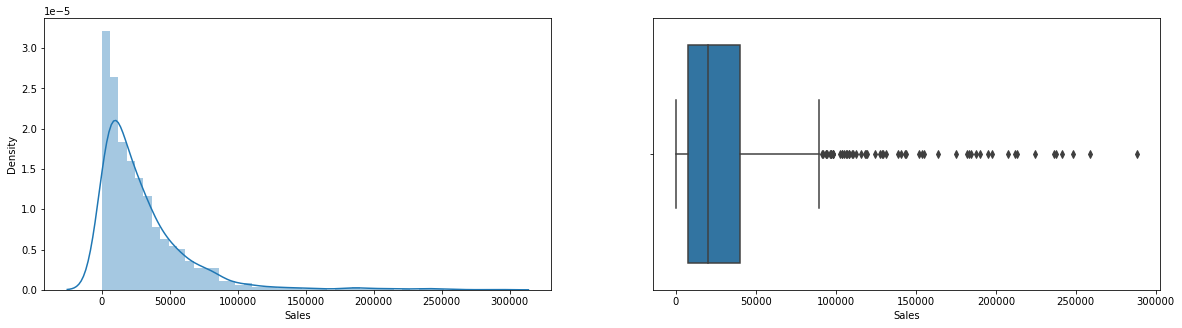

In [6]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data['Sales'])
plt.subplot(1,2,2)
sns.boxplot(data['Sales'])
plt.show()

As the distribution plot shows which is also presented in Hina and Junfei's works, Sales column is skewed to the right. And there is large number of outliers. Besides taking log and quantile based capping, one way to handle outliers is to normalize them.

In [7]:
def normalize(column):
    up = column.max()
    lo = column.min()
    y = (column - lo)/(up-lo)
    return y

In [8]:
data['Sales'] = normalize(data['Sales'])

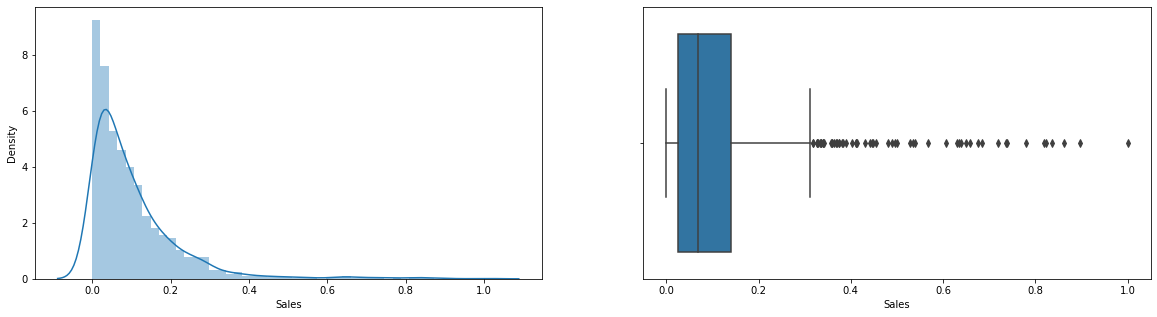

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data['Sales'])
plt.subplot(1,2,2)
sns.boxplot(data['Sales'])
plt.show()

After normalizing to scale 0 to 1, it is clear to see that the distribution is still skewed. Taking a log and percentile capping are more feasible ways in this case.

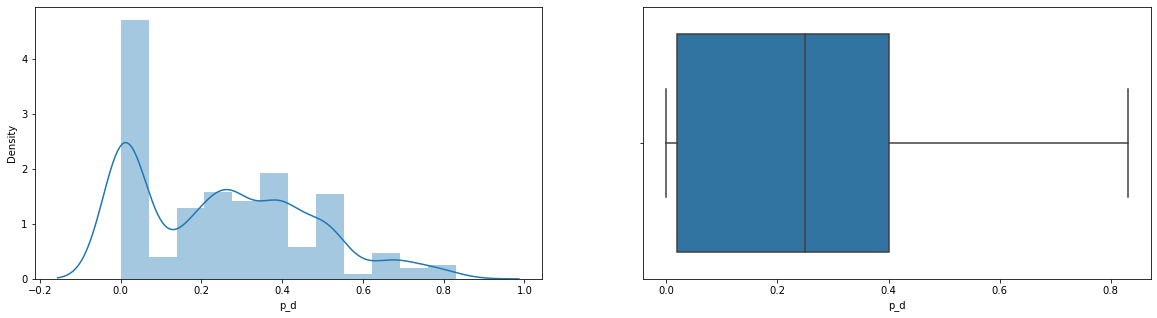

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data['p_d'])
plt.subplot(1,2,2)
sns.boxplot(data['p_d'])
plt.show()

Price Discount has no outliers.

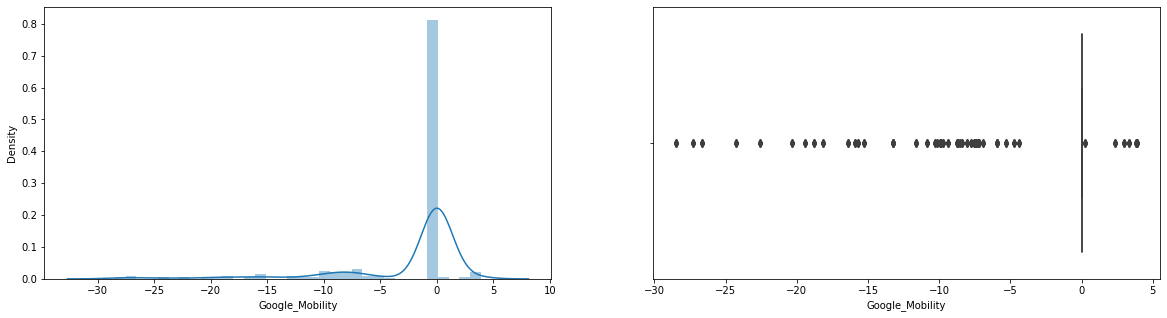

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data['Google_Mobility'])
plt.subplot(1,2,2)
sns.boxplot(data['Google_Mobility'])
plt.show()

Distribution plot and boxplot show that for Google Mobility column, values are more like to be unique than to be outlliers as Hina suggests.